In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
df=pd.read_csv('perch_full.csv')
X=df.to_numpy()
Y = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
t_x,tt_x,t_y,tt_y=train_test_split(X,Y,random_state=42)
t_x.shape

(42, 3)

In [2]:
from sklearn.preprocessing import PolynomialFeatures
p_m=PolynomialFeatures(include_bias=False)# 전처리기
p_m.fit([[2,3]])
p_m.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [3]:
p_m=PolynomialFeatures(include_bias=False)
p_m.fit(t_x)
p_t_x=p_m.transform(t_x)
p_tt_x=p_m.transform(tt_x)

In [4]:
p_m.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [5]:
from sklearn.linear_model import LinearRegression
m_lr=LinearRegression()
m_lr.fit(p_t_x,t_y)
lr=LinearRegression().fit(t_x,t_y)
print(lr.score(tt_x,tt_y),lr.score(t_x,t_y))

0.8796419177546366 0.9559326821885706


In [6]:
m_lr.score(p_tt_x,tt_y)

0.9714559911594155

In [7]:
m_lr.score(p_t_x,t_y)

0.9903183436982125

In [8]:
p_m1=PolynomialFeatures(degree=5,include_bias=False).fit(t_x)
d_t_x=p_m1.transform(t_x)
d_tt_x=p_m1.transform(tt_x)

In [9]:
d_t_x.shape

(42, 55)

In [10]:
m_lr1=LinearRegression().fit(d_t_x,t_y)
print(m_lr1.score(d_tt_x,tt_y),m_lr1.score(d_t_x,t_y))

-144.40744532797535 0.9999999999938143


In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler().fit(d_t_x)
sc_t_x= ss.transform(d_t_x)
sc_tt_x= ss.transform(d_tt_x)
sc_t_x.shape

(42, 55)

In [12]:
from sklearn.linear_model import Ridge, Lasso
rg=Ridge().fit(sc_t_x,t_y)
rg.score(sc_t_x,t_y)

0.9896101671037343

In [13]:
rg.score(sc_tt_x,tt_y)

0.979069397761539

In [14]:
import matplotlib.pyplot as plt
t_l=[]
tt_l=[]
ap_l=[0.001,0.01,0.1,1,10,100]
for i in ap_l:
    f_rg=Ridge(alpha=i).fit(sc_t_x,t_y)
    t_l.append(f_rg.score(sc_t_x,t_y))
    tt_l.append(f_rg.score(sc_tt_x,tt_y))

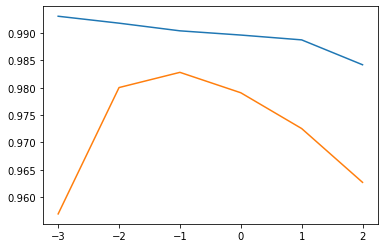

In [15]:
plt.plot(np.log10(ap_l),t_l)#R^2
plt.plot(np.log10(ap_l),tt_l)

In [16]:
rlr=Ridge(alpha=0.1).fit(sc_t_x,t_y)
print(rlr.score(sc_t_x,t_y))
print(rlr.score(sc_tt_x,tt_y))

0.9903815817570368
0.9827976465386954


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939724, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475362, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926335934, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


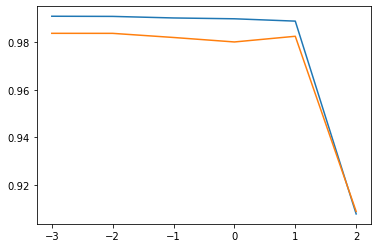

In [17]:
t_l=[]
tt_l=[]
ap_l=[0.001,0.01,0.1,1,10,100]
for i in ap_l:
    lo=Lasso(alpha=i).fit(sc_t_x,t_y)
    t_l.append(lo.score(sc_t_x,t_y))
    tt_l.append(lo.score(sc_tt_x,tt_y))
plt.plot(np.log10(ap_l),t_l)#R^2
plt.plot(np.log10(ap_l),tt_l)

In [18]:
lasso = Lasso(alpha=10)
lasso.fit(sc_t_x,t_y)
print(lasso.score(sc_t_x,t_y),lasso.score(sc_tt_x,tt_y))

0.9888067471131867 0.9824470598706695
